In [6]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from dataset import sequence
import matplotlib.pyplot as plt
from attention_seq2seq import AttentionSeq2seq


In [12]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()
x_train

array([[ 8, 22,  9, ...,  7,  7,  7],
       [17,  2,  6, ...,  7,  7,  7],
       [27,  1, 41, ...,  7,  7,  7],
       ...,
       [11, 11, 22, ...,  7,  7,  7],
       [ 4, 37,  6, ...,  7,  7,  7],
       [58,  1, 49, ..., 11,  7,  7]])

In [9]:
# Reverse input
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
x_train, x_test

(array([[ 8, 22,  9, ...,  7,  7,  7],
        [17,  2,  6, ...,  7,  7,  7],
        [27,  1, 41, ...,  7,  7,  7],
        ...,
        [11, 11, 22, ...,  7,  7,  7],
        [ 4, 37,  6, ...,  7,  7,  7],
        [58,  1, 49, ..., 11,  7,  7]]), array([[11, 16, 22, ...,  7,  7,  7],
        [ 3, 55, 18, ..., 21,  7,  7],
        [30, 37,  6, ...,  7,  7,  7],
        ...,
        [11,  8, 22, ...,  7,  7,  7],
        [17, 24, 43, ...,  7,  7,  7],
        [26,  1,  2, ...,  7,  7,  7]]))

In [3]:
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
model.load_params()

_idx = 0
def visualize(attention_map, row_labels, column_labels):
    fig, ax = plt.subplots()
    ax.pcolor(attention_map, cmap=plt.cm.Greys_r, vmin=0.0, vmax=1.0)

    ax.patch.set_facecolor('black')
    ax.set_yticks(np.arange(attention_map.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(attention_map.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)

    global _idx
    _idx += 1
    plt.show()


np.random.seed(1984)


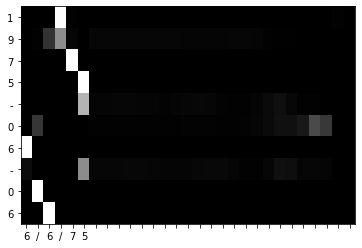

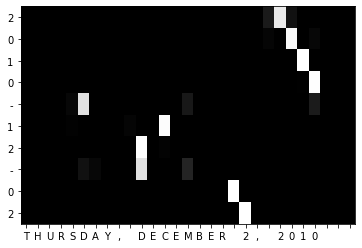

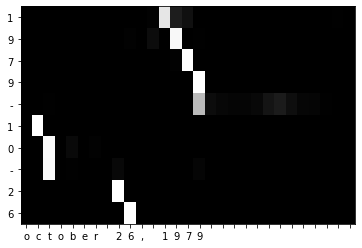

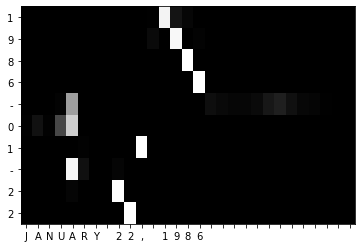

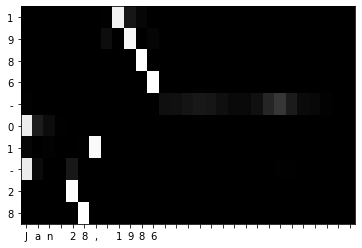

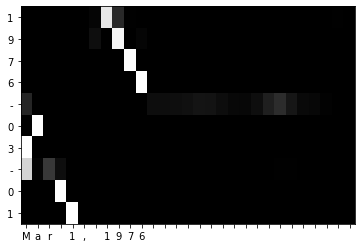

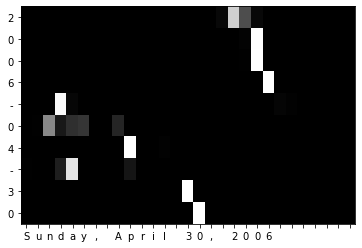

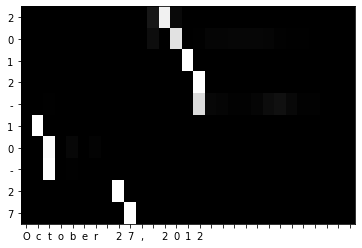

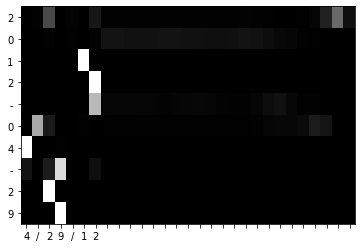

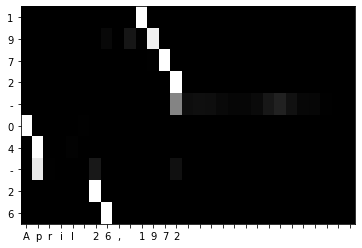

In [5]:
for _ in range(10):
    idx = [np.random.randint(0, len(x_test))]
    x = x_test[idx]
    t = t_test[idx]

    model.forward(x, t)
    d = model.decoder.attention.attention_weights
    d = np.array(d)
    attention_map = d.reshape(d.shape[0], d.shape[2])

    # reverse for print
    attention_map = attention_map[:,::-1]
    x = x[:,::-1]

    row_labels = [id_to_char[i] for i in x[0]]
    column_labels = [id_to_char[i] for i in t[0]]
    column_labels = column_labels[1:]

    visualize(attention_map, row_labels, column_labels)